In [2]:
import cirq
import numpy as np
import sympy
from qiskit import *
from qiskit import QuantumCircuit
from qiskit.circuit import QuantumRegister, ClassicalRegister
import matplotlib.pyplot as plt

from qiskit.visualization import *

In [3]:
import server

server = server.Server()

def plot(res):
    # Convert keys to integers and sort them
    keys_as_int = sorted(map(int, res.keys()))

    # Convert integers to binary representation in big endian
    binary_labels = [format(key, '03b') for key in keys_as_int]

    # Extract corresponding values
    values = [res[str(key)] for key in keys_as_int]

    # Plotting
    plt.bar(binary_labels, values)
    plt.xlabel('Binary Number (Big Endian)')
    plt.ylabel('Value')
    plt.title('Histogram of Result Object')
    plt.show()

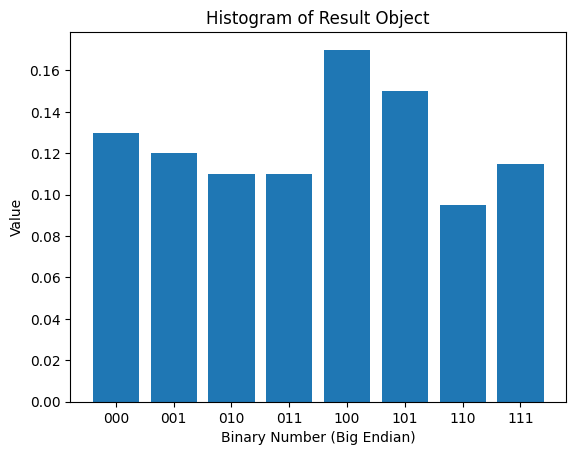

In [7]:
res1 = {
 '0': 0.13,
 '1': 0.12,
 '2': 0.11,
 '3': 0.11,
 '4': 0.17,
 '5': 0.15,
 '6': 0.095,
 '7': 0.115}

plot(res1)

In [38]:
qc = QuantumCircuit(3)

In [42]:
qc.h(0)
qc.h(1)
qc.h(2)

qc.measure_all


<bound method QuantumCircuit.measure_all of <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x78aa05f6f050>>

In [43]:
qc.draw()

┌───┐┌───┐
q_0: ┤ H ├┤ H ├
     ├───┤├───┤
q_1: ┤ H ├┤ H ├
     ├───┤├───┤
q_2: ┤ H ├┤ H ├
     └───┘└───┘

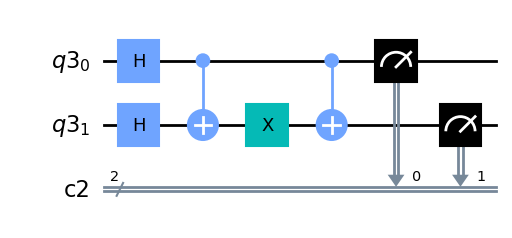

In [7]:
qr = QuantumRegister(2)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)

####### your code goes here #######
q0, q1 = qr
qc.h(q0)
qc.h(q1)

qc.cx(q0,q1)

qc.x(q1)

qc.cx(q0,q1)


qc.measure(qr[0], cr[0])
qc.measure(qr[1], cr[1])

qc.draw("mpl")

In [5]:
qc.qasm()

'OPENQASM 2.0;\ninclude "qelib1.inc";\nqreg q1[2];\ncreg c0[2];\nh q1[0];\nh q1[1];\ncx q1[0],q1[1];\nx q1[1];\ncx q1[0],q1[1];\nmeasure q1[0] -> c0[0];\nmeasure q1[1] -> c0[1];\n'

Counts: {'11': 252, '01': 283, '00': 251, '10': 238}


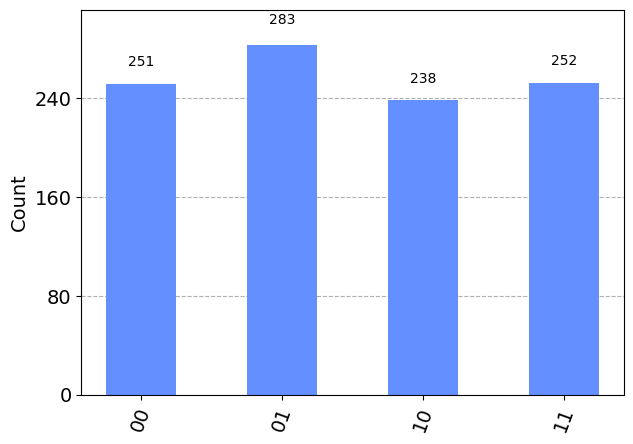

In [20]:
from qiskit_aer import AerSimulator

# initialize the simulator
backend_sim = AerSimulator()

# run the circuit
reset_sim_job = backend_sim.run(qc)
# get the results
reset_sim_result = reset_sim_job.result()
# retrieve the bitstring counts
reset_sim_counts = reset_sim_result.get_counts()

print(f"Counts: {reset_sim_counts}")
plot_histogram(reset_sim_counts)